# 1) Library_Load

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2) File_Read & check

### Load data

In [20]:
data = pd.read_csv('C:/Users/user/alzheimers_disease_dataset.csv')
data.head()

,ID,Class,Hippocampus,Entorhinal
0,2,0,8336,4177
1,3,2,5319,1791
2,4,1,6869,3983
3,5,0,7075,4433
4,6,1,5348,2277


### Data check

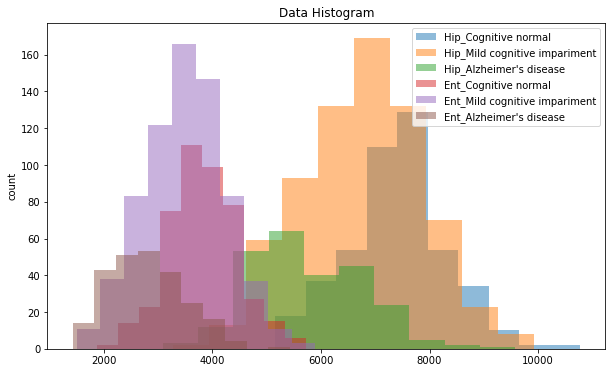

In [29]:
h0 = list(data[data['Class']==0]['Hippocampus'])
h1 = list(data[data['Class']==1]['Hippocampus'])
h2 = list(data[data['Class']==2]['Hippocampus'])
e0 = list(data[data['Class']==0]['Entorhinal'])
e1 = list(data[data['Class']==1]['Entorhinal'])
e2 = list(data[data['Class']==2]['Entorhinal'])

plt.hist(h0, alpha=0.5, label='Hip_Cognitive normal')
plt.hist(h1, alpha=0.5, label='Hip_Mild cognitive impariment')
plt.hist(h2, alpha=0.5, label="Hip_Alzheimer's disease")
plt.hist(e0, alpha=0.5, label='Ent_Cognitive normal')
plt.hist(e1, alpha=0.5, label='Ent_Mild cognitive impariment')
plt.hist(e2, alpha=0.5, label="Ent_Alzheimer's disease")

plt.rcParams["figure.figsize"] = (10,6)
plt.legend()
plt.ylabel("count")
plt.title('Data Histogram')
plt.show()

# 3) Define Univariate MLE with μ,σ _ group by Class

## Univariate_MLE_(gaussian estimation)

In [22]:
# Assumption of Gaussian distribution (univariate)

def U_MLE (x, mu, sig):
    front = (2 * np.pi)**(1/2)
    return (np.exp(-(x-mu)**2 / 2 / sig**2) / (front * sig))

In [23]:
# We already know that the likelihood value is the maximum in the mean and variance of the sample.
# so, before estimating the distribution, calculate the mean and sigma for each column first.

df = pd.DataFrame(data, columns=['Class','Hippocampus','Entorhinal'])
g = df.groupby('Class')
# g_mean = g.mean()
g_mean = g.mean()
g_std = g.std()
df1 = pd.DataFrame(data=g_mean)
df2 = pd.DataFrame(data=g_std)
print(df1)
print(df2)

       Hippocampus   Entorhinal
Class                          
0      7418.973333  3830.055556
1      6772.206847  3499.640514
2      5759.518072  2815.289157
       Hippocampus  Entorhinal
Class                         
0       901.484007  634.953348
1      1133.051374  745.595106
2      1019.341949  681.609721


###	■ Feature 1 (Hippocampus) univariate MLE for each diagnosis group

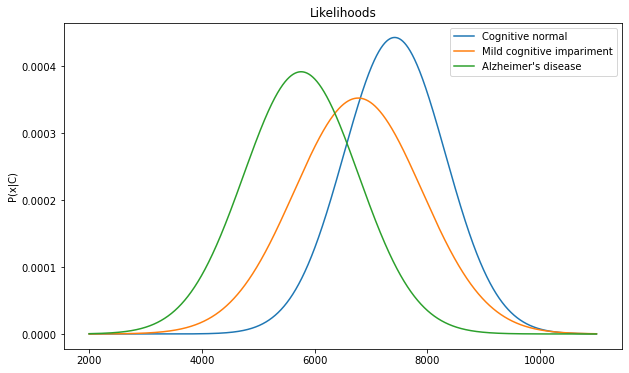

In [24]:
xs = [x for x in range(2000,11000)]
plt.plot(xs,[U_MLE(x,mu = df1.iloc[0,0], sig = df2.iloc[0,0]) for x in xs],'-',label='Cognitive normal')
plt.plot(xs,[U_MLE(x,mu = df1.iloc[1,0], sig = df2.iloc[1,0]) for x in xs],'-',label='Mild cognitive impariment')
plt.plot(xs,[U_MLE(x,mu = df1.iloc[2,0], sig = df2.iloc[2,0]) for x in xs],'-',label="Alzheimer's disease")
plt.legend()
plt.ylabel("P(x|C)")
plt.title('Likelihoods')
plt.show()

### ■ Feature 2 (Entorhinal cortex) univariate MLE for each diagnosis group

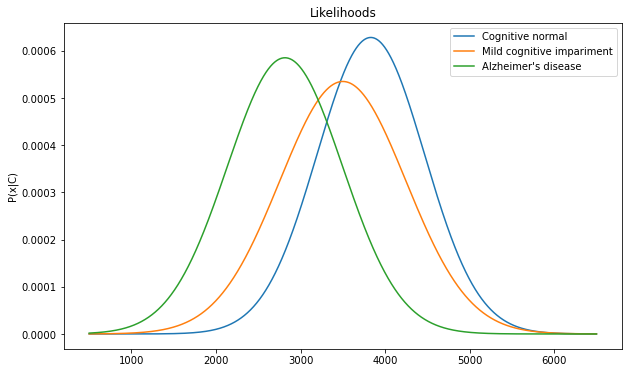

In [25]:
xs = [x for x in range(500,6500)]
plt.plot(xs,[U_MLE(x,mu = df1.iloc[0,1], sig = df2.iloc[0,1]) for x in xs],'-',label='Cognitive normal')
plt.plot(xs,[U_MLE(x,mu = df1.iloc[1,1], sig = df2.iloc[1,1]) for x in xs],'-',label='Mild cognitive impariment')
plt.plot(xs,[U_MLE(x,mu = df1.iloc[2,1], sig = df2.iloc[2,1]) for x in xs],'-',label="Alzheimer's disease")
plt.legend()
plt.ylabel("P(x|C)")
plt.title('Likelihoods')
plt.show()

# 4) Define Multivariate MLE for each diagnosis group

## Multivariate_MLE_(gaussian estimation)

In [26]:
def M_MLE (x, mu, cov) :
    x = x.reshape(1,-1)
    mu = mu.reshape(1,-1)
    p = cov.shape

    cov_inv = np.linalg.inv(cov)
    front = (2 * np.pi * np.linalg.det(cov))**(1/2)
    back = np.exp(-(1/2) * (x-mu) @ cov_inv @ np.transpose(x-mu))
    
    return (1 / front) * back

### covariance

In [27]:
# In multivariate MLE, it has the maximum likelihood in the mean & covariance about x1,x2
# so, find mean (1x2), covariance(2x2) matrix first.

C = df.groupby('Class').cov()
Co = C.to_numpy()
cov0 = Co[0:2]
cov1 = Co[2:4]
cov2 = Co[4:6]
mu0 = df1.to_numpy()[0]
mu1 = df1.to_numpy()[1]
mu2 = df1.to_numpy()[2]

### ■ Feature 3 Hippocampus / Entorhinal cortex bivariate MLE for each diagnosis group

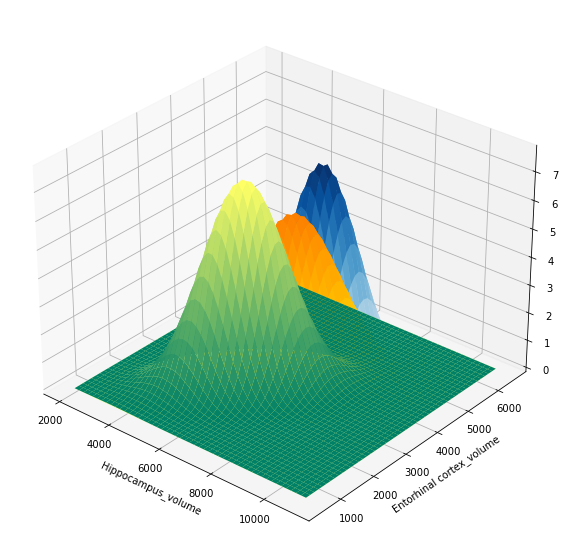

In [28]:
X = np.linspace(2000, 11000)
Y = np.linspace(500, 6500)
X, Y = np.meshgrid(X, Y)

pl0 = np.array(  [M_MLE( np.array([xx,yy]).reshape(-1,1), mu0, cov0) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
pl1 = np.array(  [M_MLE( np.array([xx,yy]).reshape(-1,1), mu1, cov1) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
pl2 = np.array(  [M_MLE( np.array([xx,yy]).reshape(-1,1), mu2, cov2) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z0 = pl0.reshape(X.shape)
Z1 = pl1.reshape(X.shape)
Z2 = pl2.reshape(X.shape)


fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z0, linewidth=0, antialiased=True, cmap='Blues',label="Alzheimer's disease")
ax.plot_surface(X, Y, Z1, linewidth=0, antialiased=True, cmap='Wistia',label='Mild cognitive impariment')
ax.plot_surface(X, Y, Z2, linewidth=0, antialiased=True, cmap='summer',label='Cognitive normal')

ax.view_init(30,-50)

ax.set_xlabel('Hippocampus_volume')
ax.set_ylabel('Entorhinal cortex_volume')
plt.show()

# Conclusion : According to these results, it can be estimated that the smaller the volume of the hippocampus and Entorhinal cortex, the higher the probability of developing Alzheimer's disease.